### 本项目的目标

- 使用Keras深度学习框架对Mnist数据集进行分类，并对分类结果进行降维可视化

- 导入Mnist数据集
- 部分样本可视化
- 构建多层神经网络并分析参数
- 模型训练及可视化
- 输出层结果降维，二维及三维可视化
- 项目总结

In [1]:
#导入数据分析的常用工具包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
#导入keras工具包
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation
from keras.optimizers import SGD

Using TensorFlow backend.


### 导入Mnist数据集

In [3]:
from keras.datasets import mnist
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [4]:
#查看数据集的大小
print('训练数据的大小:',X_train.shape)
print('训练标签的大小:',y_train.shape)
print('测试数据的大小:',X_test.shape)
print('测试标签的大小:',y_test.shape)

训练数据的大小: (60000, 28, 28)
训练标签的大小: (60000,)
测试数据的大小: (10000, 28, 28)
测试标签的大小: (10000,)


### 可视化部分样本

In [5]:
plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签  
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

Text(0.5, 1.0, '真实标签:1')

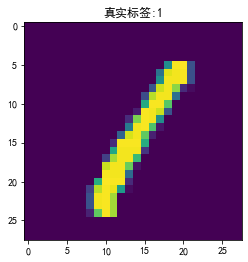

In [6]:
plt.imshow(X_train[3])
plt.title('真实标签:'+str(y_train[3]))

Text(0.5, 1.0, '真实标签:3')

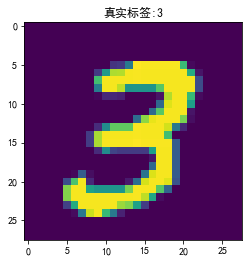

In [7]:
plt.imshow(X_train[7])
plt.title('真实标签:'+str(y_train[7]))

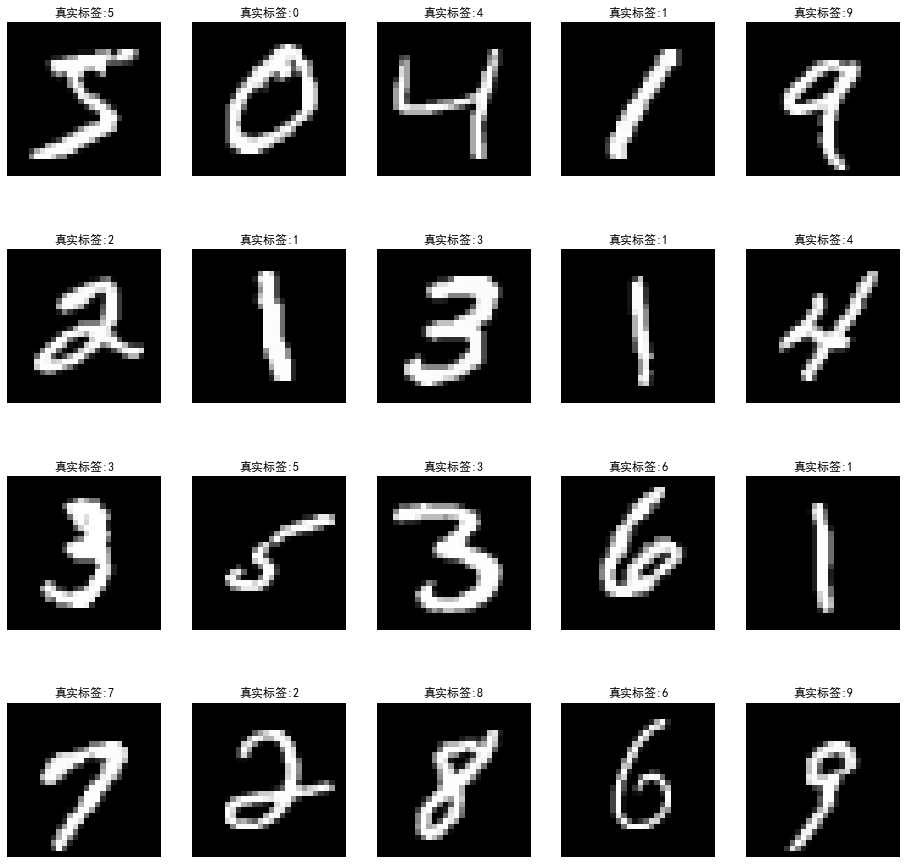

In [8]:
#可视化训练样本中前20个数字
plt.figure(figsize = (16,16))

for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(X_train[i],cmap = 'gray')
    plt.title('真实标签:'+str(y_train[i]))
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')

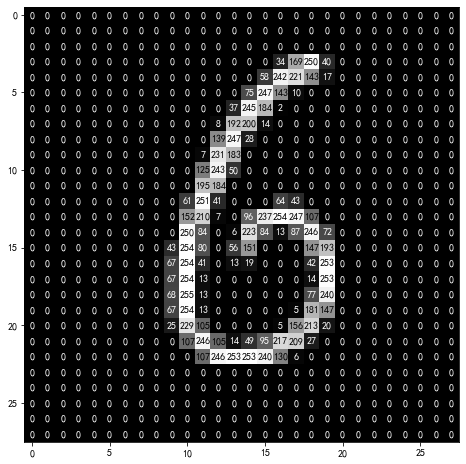

In [9]:
# 绘制像素热力图
def visualize_input(img, ax):
    # 先绘制数字的大图，然后对784个像素每一个像素标注灰度值
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

#绘制索引为18的图片的热力图
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
visualize_input(X_train[18],ax)

### 数据预处理

将28X28的图像数据转化为784维的长向量数据，并对像素数据进行归一化处理，对标签数据进行one_hot_encoding编码处理。

In [10]:
X_train = X_train.reshape(60000,784)
X_test = X_test.reshape(10000,784)

X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)

In [11]:
#归一化处理
X_train = X_train/255
X_test = X_test/255

In [12]:
#将标签数据转换为one_hot_encoding编码
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

### 构建多层感知机模型

In [13]:
model = Sequential()
#添加第一层神经元
model.add(Dense(512,activation = 'relu',input_shape = (784,)))
model.add(Dropout(0.2))
#添加第二层神经元
model.add(Dense(256,activation = 'relu'))
model.add(Dropout(0.2))
#添加输出层
model.add(Dense(10,activation = 'softmax'))

In [14]:
model.compile(loss = 'categorical_crossentropy',optimizer = SGD(lr=0.001),metrics = ['accuracy'])

In [15]:
#查看该网络的结果
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [16]:
#配置Tensorboard可视化工具

from keras.callbacks import TensorBoard
tensorboard = TensorBoard(log_dir = './tensorboard/keras_log')

In [17]:
#使用模型训练该数据集
history = model.fit(X_train,y_train,batch_size = 128,epochs = 50,validation_split = 0.2,callbacks = [tensorboard])

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 5s 98us/step - loss: 2.1999 - accuracy: 0.2047 - val_loss: 2.0334 - val_accuracy: 0.4523
Epoch 2/50
48000/48000 [==============================] - 4s 93us/step - loss: 1.9572 - accuracy: 0.4372 - val_loss: 1.7804 - val_accuracy: 0.6453
Epoch 3/50
48000/48000 [==============================] - 5s 94us/step - loss: 1.7176 - accuracy: 0.5727 - val_loss: 1.5259 - val_accuracy: 0.7216
Epoch 4/50
48000/48000 [==============================] - 4s 90us/step - loss: 1.4900 - accuracy: 0.6450 - val_loss: 1.2918 - val_accuracy: 0.7709
Epoch 5/50
48000/48000 [==============================] - 4s 90us/step - loss: 1.2939 - accuracy: 0.6925 - val_loss: 1.0969 - val_accuracy: 0.8045
Epoch 6/50
48000/48000 [==============================] - 5s 102us/step - loss: 1.1287 - accuracy: 0.7296 - val_loss: 0.9440 - val_accuracy: 0.8250
Epoch 7/50
48000/48000 [==============================] - 5s 96us/s

In [18]:
def plot_history(network_history):
    plt.figure()
    plt.xlabel('训练的轮数')
    plt.ylabel('损失值的大小')
    plt.plot(network_history.history['loss'])
    plt.plot(network_history.history['val_loss'])
    plt.legend(['训练损失','验证损失'],loc = 'best')
    plt.title('训练过程中的损失函数变化')
    plt.grid()
    
    plt.figure()
    plt.xlabel('训练的轮数')
    plt.ylabel('精度的大小')
    plt.plot(network_history.history['accuracy'])
    plt.plot(network_history.history['val_accuracy'])
    plt.legend(['训练精度','验证精度'],loc = 'best')
    plt.title('训练过程中的损精度的变化')
    plt.grid()    

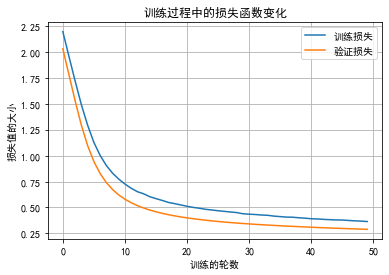

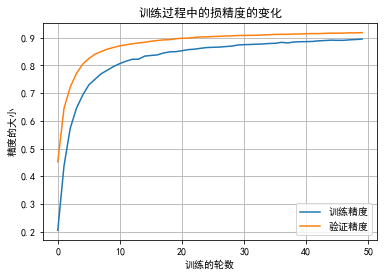

In [19]:
plot_history(history)

由上述的损失函数图和准确率图可以看出，模型在训练的过程中未产生过拟合现象。模型最终的验证准确率为92%，还是一个比较不错的结果。